#### CMSE 202 Final Project
### &#9989; Aniessa Terpstra
### &#9989; Section_003
#### &#9989; 04/10/2022

# ___Modeling the retirement funds of a neighborhood___

## Background and Motivation

For this porject I wanted to look at retirement funds. We all know that retrieing is stressful and therefore we try to plan for it by saving ahead of time. But because of this, we have money that appears to be laying around, and sometimes we have to take out money from our retirement fund. For example, we could become unemployed, and the only money that we have readily available is our retirement fund. For this project I want to see what effect that has. I will be looking at things such as being, unemployed, going through a divorce, and buying a house. These things can all effect your retirement fund if you decide to withdrawl from it. 

The questions I am going to look at is which of the three situations (buying a house, divorce, or being unemployed) has the most affect? Time deffinetly plays a roll in this as well, but at what points does time become critical? What makes it so critical at that point?

## Methodology

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [28]:
class retirement():
    '''This class is going to model a retirement fund over time depending on different life situations. Currently this 
    class takes into account divorce, buying a house, and being unemployed for a period of time. '''
    def __init__(self,start,rate,years,salary,percentage):
        """this function initializes the object and takes in...
        start: The begginging amount in the reitrement fund
        rate: The interest rate of the savings account that the money is in
        years: How long someone has been saving for the fund
        salary: Their starting salary
        Perecentage: The percentage of their income they are willing to put away each year."""
        self.start = start
        self.rate = rate
        self.years = years
        self.salary = salary
        self.percentage = percentage
        self.contributions = []
        self.time = []
        self.retirement = []
        
    def plot(self):
        """This function is going to plot out the retirement fund with time on the x and the fund on the y."""
        plt.plot(self.time,self.retirement)
        
    def update_salary(self):
        """This function updates the salary so that it increases by 3%. That is the 
        normal raise that american get each year."""
        self.salary += self.salary*.03
        
    def get_contributions(self):
        """This function is going to create list of contributions that someone is going to put towards their
        retirement fund each year."""
        for i in range(self.years):
            add = self.salary*.75*self.percentage #this is creating the ammount that someone is willing to put
            #in their retirement fund each year. It accounts for taxes being taken out as well. 
            self.contributions.append(add) #appends that contribution to a list. 
            self.update_salary()#updates the salary 
        
    def divorce(self):
        """This function is going to simulate divorce."""
        self.start = self.start/2
        #This takes the starting amount of the reitrement fund (which is udated each year) and divides
        #it by two.
        self.retirement.append(self.start)#adding it to the reiterment fund list
        
    def buy_house(self,down_payment):
        """This function simmulate buying a house. More than likley this is going to be if someone needs a 
        down payment for their house. """
        self.start -= down_payment #This decreases the start salary by the down payment 
        self.retirement.append(self.start)#adding it to the reiterment fund list
    
    def unemployed(self,monthly_cost):
        """This function is going to simmulate being unemployed."""
        self.start -= monthly_cost #Decreases the start value by the cost of living. 
        self.retirement.append(self.start) #adding it to the reiterment fund list
                
    def update(self,divorce_age="Nan",house_age="Nan",down_payment="Nan",
               unemployment_start=0,unemployment_end=0,yearly_cost="Nan"):
        """This function is where it is all brought together. It calls each of the functions above, but only
        runs them under certain conditions."""
        for i in range(len(self.contributions)):
            if i == divorce_age: #this says if i (which is that time after the retirement fund was created)
                #equals the age that they got divorced then run the divorce function. 
                self.divorce()
                self.time.append(i) #it also adds time to the time list, so that the retirement fund can be 
                #easily plotted out later. 
                
            if i == house_age: #This says if i equals the age they got a house run the house function. 
                self.buy_house(down_payment)
                self.time.append(i) #updates time list
                
            if (i>unemployment_start) & (i<unemployment_end): #This says if i is inbetween the time that
                #they are unemployed run the unemployment function
                self.unemployed(yearly_cost)
                self.time.append(i) #updates time
                
            else:
                #This is just adding interest to the retirement fund over the years
                funds = self.contributions[i] + self.contributions[i]*self.rate 
                self.start += funds
                self.retirement.append(self.start)
                self.time.append(i)
        self.plot()
        print(self.retirement[len(self.retirement)-1])

Below are three code chunks are three different objects of the retirement class. Everything is the same about. They have the same salary, time saved, interest rate, and percentage of saving. The only difference is the time that they went through a divorce. 

383829.732759081


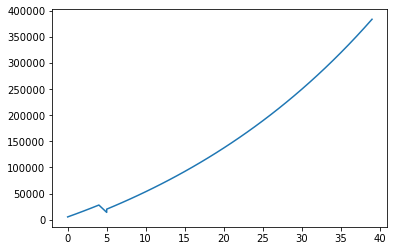

In [12]:
lex = retirement(0,.005,40,70000,.1)
lex.get_contributions()
lex.update(divorce_age=5)

326948.4899690956


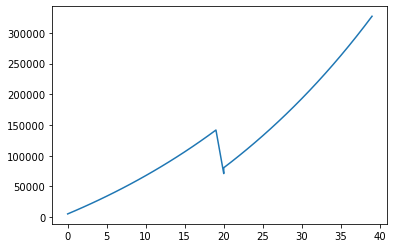

In [13]:
mia = retirement(0,.005,40,70000,.1)
mia.get_contributions()
mia.update(divorce_age=20)

272326.0031075964


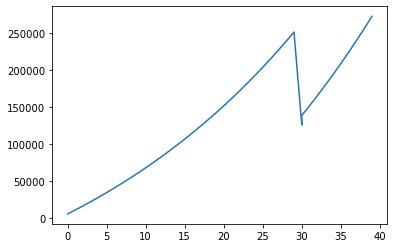

In [14]:
eve = retirement(0,.005,40,70000,.1)
eve.get_contributions()
eve.update(divorce_age=30)

From this we can see that ideally you want to get divorced relativley early after starting youre retirement fund. Obvisouly people don't have control over when they get divorced, but this shows the impact that time. The difference between getting a divorce 5 years after saving and 30 years is about 110,000.

Next I wanted to see how time affected when you bought a house and your retirement fund. To do this I again created two identical objects, but the only thing that changed was when they chose to take out money for their down payment on their house. 

387835.8966678372


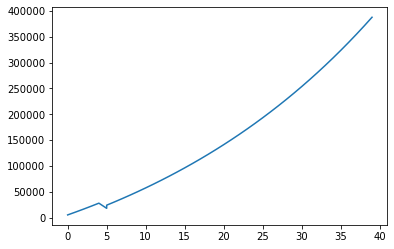

In [15]:
ace = retirement(0,.005,40,70000,.1)
ace.get_contributions()
ace.update(house_age=5,down_payment=10000)

387835.8966678372


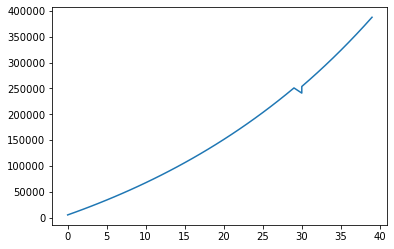

In [17]:
leo = retirement(0,.005,40,70000,.1)
leo.get_contributions()
leo.update(house_age=30,down_payment=10000)

This result was very surprising. Time doesn't have an affect on your retirement fund, in the respect to when you should buy a house, if you are going to take a down payment out. For both of these cases the ending retirement fund was 387,835 even though one bought a house 5 years after saving and the other did it 30 years after saving. 

387835.8966678372


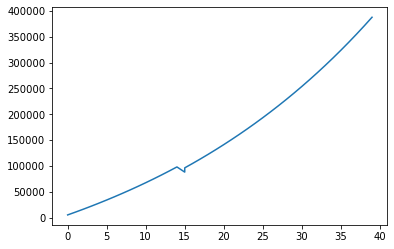

In [33]:
sky = retirement(0,.005,40,70000,.1)
sky.get_contributions()
sky.update(house_age=15,down_payment=10000)

347835.8966678372


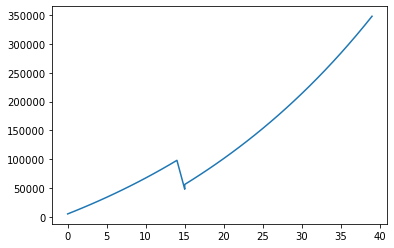

In [24]:
lou = retirement(0,.005,40,70000,.1)
lou.get_contributions()
lou.update(house_age=15,down_payment=50000)

This result was also interesting. The retirement fund only decreased by how much was taken out for the the down payment. I originally thought that taking out more money would have a bigger impact because then there would be less money that would be affected by interest. That either isn't the case or the interest is so low in this case that it doesn't matter. 

Next I wanted to look at how being unemplyed effects a retirement fund. 

363700.3327074274


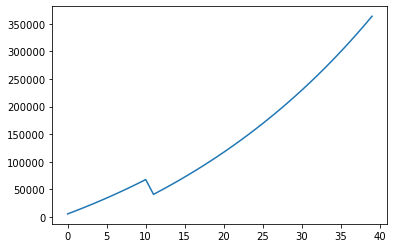

In [30]:
ray = retirement(0,.005,40,70000,.1)
ray.get_contributions()
ray.update(unemployment_start=10,unemployment_end=12,yearly_cost=26832) #I got the yearly cost by multiplying the
#cost living for a single person in michigan (2236) by 12 

329345.6618282052


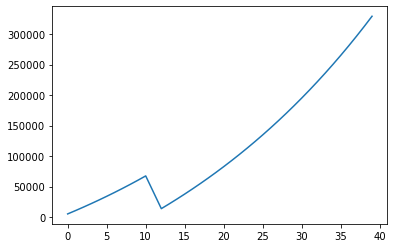

In [32]:
sid = retirement(0,.005,40,70000,.1)
sid.get_contributions()
sid.update(unemployment_start=10,unemployment_end=13,yearly_cost=26832) #I got the yearly cost by multiplying the
#cost living for a single person in michigan (2236) by 12 

326984.2269987684


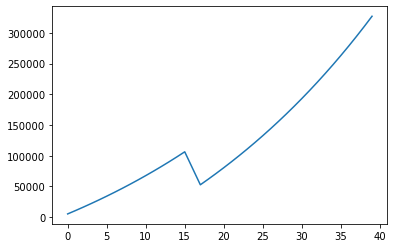

In [35]:
sid = retirement(0,.005,40,70000,.1)
sid.get_contributions()
sid.update(unemployment_start=15,unemployment_end=18,yearly_cost=26832) #I got the yearly cost by multiplying the
#cost living for a single person in michigan (2236) by 12 

## Results

_(What did you find when you carried out your methods? Some of your code related to
presenting results/figures/data may be replicated from the methods section or may only be present in
this section. All of the plots that you plan on using for your presentation should be present in this
section)_

## Discussion and Conclusion

_(What did you learn from your results? What obstacles did you run into? What would you do differently next time? Clearly provide quantitative answers to your question(s)?  At least one of your questions should be answered with numbers.  That is, it is not sufficient to answer "yes" or "no", but rather to say something quantitative such as variable 1 increased roughly 10% for every 1 year increase in variable 2.)_

### References

_(List the source(s) for any data and/or literature cited in your project.  Ideally, this should be formatted using a formal citation format (MLA or APA or other, your choice!).   Multiple free online citation generators are available such as <a href="http://www.easybib.com/style">http://www.easybib.com/style</a>. **Important:** if you use **any** code that you find on the internet for your project you **must** cite it or you risk losing most/all of the points for you project.)_